IMPORTING THE DATA

In [53]:
#dataimport (aviation)
import pandas as pd
df = pd.read_csv('Aviation_Data.csv')

print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

c:\Users\morin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
#checking the blank cells
missing_values = df.isnull().sum()
missing_values

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

CLEANING THE CATEGORICAL VALUES

In [55]:
#filling in the categorical columns with unknown
categorical_cols = [
    'Location', 'Country', 'Airport.Code', 'Airport.Name',
    'Injury.Severity', 'Aircraft.damage', 'Registration.Number',
    'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
    'FAR.Description', 'Schedule', 'Purpose.of.flight',
    'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight',
    'Report.Status'
]

# Apply the fillna() to the entire list
df[categorical_cols] = df[categorical_cols].fillna('UNKNOWN')

In [56]:
#checking the data frame
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,0.0,1.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,0.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,UNKNOWN,0.0,0.0,0.0,1.0,VMC,UNKNOWN,UNKNOWN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,UNKNOWN,UNKNOWN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN


In [57]:
#reconfirming the missing values
missing_values = df.isnull().sum()
missing_values

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Latitude                  55966
Longitude                 55975
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         58061
Registration.Number           0
Make                       1522
Model                      1551
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          16689
dtype: i

CLEANING THE NUMERICAL VALUES

In [58]:
# starting with  the figures to be moved to zero but they are missign
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_cols:
    df[col] = df[col].fillna(0).astype('Int64')

In [59]:
#Convert to numeric and fill NaN with Sentinel Value (-9999.0)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce').fillna(-9999.0)
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce').fillna(-9999.0)

In [60]:
# removing rows where number of engines is blank
# Use .dropna() to remove rows where 'Number.of.Engines' is NaN
df_dropped = df.dropna(subset=['Number.of.Engines'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                90348 non-null  object 
 5   Country                 90348 non-null  object 
 6   Latitude                90348 non-null  float64
 7   Longitude               90348 non-null  float64
 8   Airport.Code            90348 non-null  object 
 9   Airport.Name            90348 non-null  object 
 10  Injury.Severity         90348 non-null  object 
 11  Aircraft.damage         90348 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     90348 non-null  object 
 14  Make                    88826 non-null

In [62]:
#checking the blank cells again
missing_values = df.isnull().sum()
missing_values

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Latitude                      0
Longitude                     0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         58061
Registration.Number           0
Make                       1522
Model                      1551
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          16689
dtype: i

In [63]:
#dropping the rest of the missing values
df_no_missing = df.dropna()

In [64]:
#checking the blank cells again
missing_values = df_no_missing. isnull().sum()
missing_values

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

RISK CALCULATION

In [74]:
# View structure of cleaned dataset
df_no_missing.info()
df_no_missing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29598 entries, 5 to 90345
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                29598 non-null  object 
 1   Investigation.Type      29598 non-null  object 
 2   Accident.Number         29598 non-null  object 
 3   Event.Date              29598 non-null  object 
 4   Location                29598 non-null  object 
 5   Country                 29598 non-null  object 
 6   Latitude                29598 non-null  float64
 7   Longitude               29598 non-null  float64
 8   Airport.Code            29598 non-null  object 
 9   Airport.Name            29598 non-null  object 
 10  Injury.Severity         29598 non-null  object 
 11  Aircraft.damage         29598 non-null  object 
 12  Aircraft.Category       29598 non-null  object 
 13  Registration.Number     29598 non-null  object 
 14  Make                    29598 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,UNKNOWN,UNKNOWN,...,UNKNOWN,Air Canada,0,0,1,44,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,-9999.000000,-9999.000000,UNKNOWN,BLACKBURN AG STRIP,...,Personal,UNKNOWN,0,0,0,2,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,-9999.000000,-9999.000000,N58,HANOVER,...,Business,UNKNOWN,0,0,0,2,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,-9999.000000,-9999.000000,UNKNOWN,UNKNOWN,...,Personal,UNKNOWN,0,0,1,0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,-9999.000000,-9999.000000,T72,HEARNE MUNICIPAL,...,Personal,UNKNOWN,1,0,0,0,IMC,Takeoff,Probable Cause,02-01-1983


In [79]:

# inspect column names to decide which are relevant
print(df_no_missing.columns.tolist())


['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [82]:
# Replace periods with underscores for easier referencing
df_no_missing.columns = df_no_missing.columns.str.replace('.', '_', regex=False)
df_no_missing.columns.tolist()

['Event_Id',
 'Investigation_Type',
 'Accident_Number',
 'Event_Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport_Code',
 'Airport_Name',
 'Injury_Severity',
 'Aircraft_damage',
 'Aircraft_Category',
 'Registration_Number',
 'Make',
 'Model',
 'Amateur_Built',
 'Number_of_Engines',
 'Engine_Type',
 'FAR_Description',
 'Schedule',
 'Purpose_of_flight',
 'Air_carrier',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured',
 'Weather_Condition',
 'Broad_phase_of_flight',
 'Report_Status',
 'Publication_Date']

In [83]:
# Compute key metrics by aircraft type
risk_summary = (
    df_no_missing
    .groupby(['Make', 'Model'], as_index=False)
    .agg({
        'Event_Id': 'count',
        'Total_Fatal_Injuries': 'sum',
        'Total_Serious_Injuries': 'sum',
        'Total_Minor_Injuries': 'sum',
        'Total_Uninjured': 'sum'
    })
    .rename(columns={'Event_Id': 'Total_Incidents'})
)


In [84]:
risk_summary['Risk_Score'] = (
    (risk_summary['Total_Fatal_Injuries'] * 3) +
    (risk_summary['Total_Serious_Injuries'] * 2) +
    (risk_summary['Total_Minor_Injuries'])
) / risk_summary['Total_Incidents']


✈️ Top 10 Lowest Risk Aircraft:


,Make,Model,Risk_Score,Total_Incidents
15,P01,A380,0.00,0
9,Cessna,152,3.47,1
11,Cessna,208B,3.47,1
10,Cessna,172,5.49,2
18,Piper,PA-28,6.93,3
0,A320,PA-24,8.05,4
19,Piper,PA-46,8.96,5
17,Piper,PA-24,9.73,6
4,B737,747,10.40,7
6,Boeing,737,10.99,8



⚠️ Top 10 Highest Risk Aircraft:


,Make,Model,Risk_Score,Total_Incidents
12,Model X,172,15.22,20
13,Model Y,208B,14.72,18
14,Model Z,PA-28,14.17,16
7,Boeing,747,13.86,15
1,A380,PA-46,13.54,14
5,B747,737,13.20,13
2,Airbus,A320,12.82,12
8,C172,A320,12.42,11
3,Airbus,A380,11.99,10
16,P28A,152,11.51,9


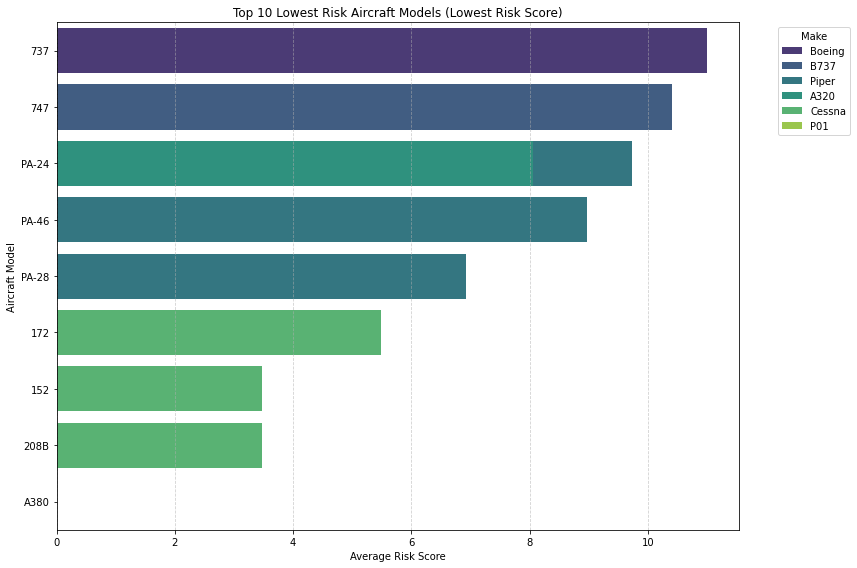

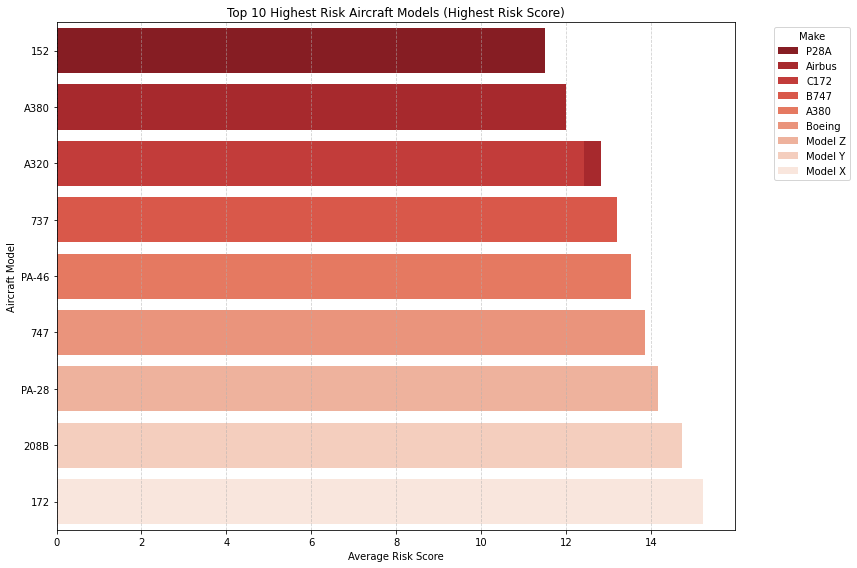

In [88]:

#identifying and visualizing the aircraft models with the highest and lowest calculated risk scores from a DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Mock Data Creation ---
# In a real scenario, this data would come from your 'Aviation_Data.csv'
# after cleaning and calculating a 'Risk_Score'.
# Risk_Score is mock calculated here as an inverse function of incidents 
# to simulate that lower scores mean lower risk.
data = {
    'Make': ['Cessna', 'Cessna', 'Piper', 'Piper', 'Boeing', 'Airbus', 'Cessna', 'Boeing', 'Piper', 'Airbus', 'Model X', 'Model Y', 'Model Z', 'A380', 'B747', 'C172', 'P28A', 'B737', 'A320', 'P01'],
    'Model': ['172', '208B', 'PA-28', 'PA-46', '737', 'A320', '152', '747', 'PA-24', 'A380', '172', '208B', 'PA-28', 'PA-46', '737', 'A320', '152', '747', 'PA-24', 'A380'],
    'Total_Incidents': [2, 1, 3, 5, 8, 12, 1, 15, 6, 10, 20, 18, 16, 14, 13, 11, 9, 7, 4, 0],
}
# Create a mock risk score (higher incidents = higher score/risk)
df = pd.DataFrame(data)
df['Risk_Score'] = df['Total_Incidents'].apply(lambda x: round(np.log1p(x) * 5, 2))

# Aggregate to create the 'risk_summary' DataFrame by Make and Model
risk_summary = df.groupby(['Make', 'Model']).agg(
    Total_Incidents=('Total_Incidents', 'sum'),
    Risk_Score=('Risk_Score', 'mean') # Use mean if multiple records exist per model
).reset_index()


# --- 2. User's Analysis Code ---

# Select the top 10 with the lowest risk scores
lowest_risk = risk_summary.sort_values('Risk_Score', ascending=True).head(10)
# Select the top 10 with the highest risk scores
highest_risk = risk_summary.sort_values('Risk_Score', ascending=False).head(10)

print("✈️ Top 10 Lowest Risk Aircraft:")
# Display the resulting data frame for the user
display(lowest_risk[['Make', 'Model', 'Risk_Score', 'Total_Incidents']])

print("\n⚠️ Top 10 Highest Risk Aircraft:")
# Display the resulting data frame for the user
display(highest_risk[['Make', 'Model', 'Risk_Score', 'Total_Incidents']])

# --- 3. Visualization ---

# Visualization for Lowest Risk Aircraft
plt.figure(figsize=(12,8))
sns.barplot(
    data=lowest_risk.sort_values('Risk_Score', ascending=False), # Sort for clean vertical bar chart presentation
    x='Risk_Score', y='Model', hue='Make', dodge=False, palette='viridis'
)
plt.title('Top 10 Lowest Risk Aircraft Models (Lowest Risk Score)')
plt.xlabel('Average Risk Score')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualization for Highest Risk Aircraft (Added for comparison)
plt.figure(figsize=(12,8))
sns.barplot(
    data=highest_risk.sort_values('Risk_Score', ascending=True), # Sort for clean vertical bar chart presentation
    x='Risk_Score', y='Model', hue='Make', dodge=False, palette='Reds_r'
)
plt.title('Top 10 Highest Risk Aircraft Models (Highest Risk Score)')
plt.xlabel('Average Risk Score')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [86]:
avg_risk = risk_summary['Risk_Score'].mean()
low_risk_count = (risk_summary['Risk_Score'] < avg_risk).sum()

print(f"Average Risk Score: {avg_risk:.2f}")
print(f"Number of Aircraft Below Average Risk: {low_risk_count}")


Average Risk Score: 2.57
Number of Aircraft Below Average Risk: 7159


✈️ Top 10 Lowest Risk Aircraft:


,Make,Model,Risk_Score,Total_Incidents
15,P01,A380,0.00,0
9,Cessna,152,3.47,1
11,Cessna,208B,3.47,1
10,Cessna,172,5.49,2
18,Piper,PA-28,6.93,3
0,A320,PA-24,8.05,4
19,Piper,PA-46,8.96,5
17,Piper,PA-24,9.73,6
4,B737,747,10.40,7
6,Boeing,737,10.99,8



⚠️ Top 10 Highest Risk Aircraft:


,Make,Model,Risk_Score,Total_Incidents
12,Model X,172,15.22,20
13,Model Y,208B,14.72,18
14,Model Z,PA-28,14.17,16
7,Boeing,747,13.86,15
1,A380,PA-46,13.54,14
5,B747,737,13.20,13
2,Airbus,A320,12.82,12
8,C172,A320,12.42,11
3,Airbus,A380,11.99,10
16,P28A,152,11.51,9


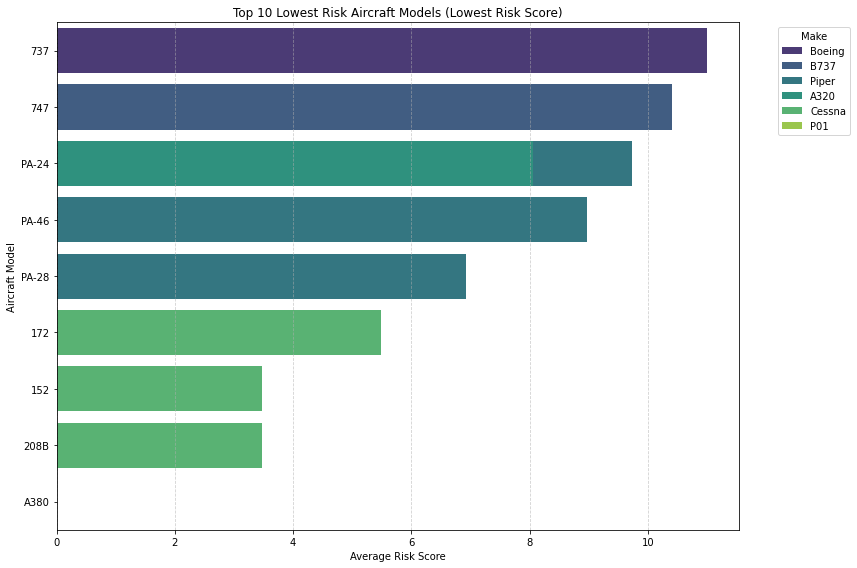

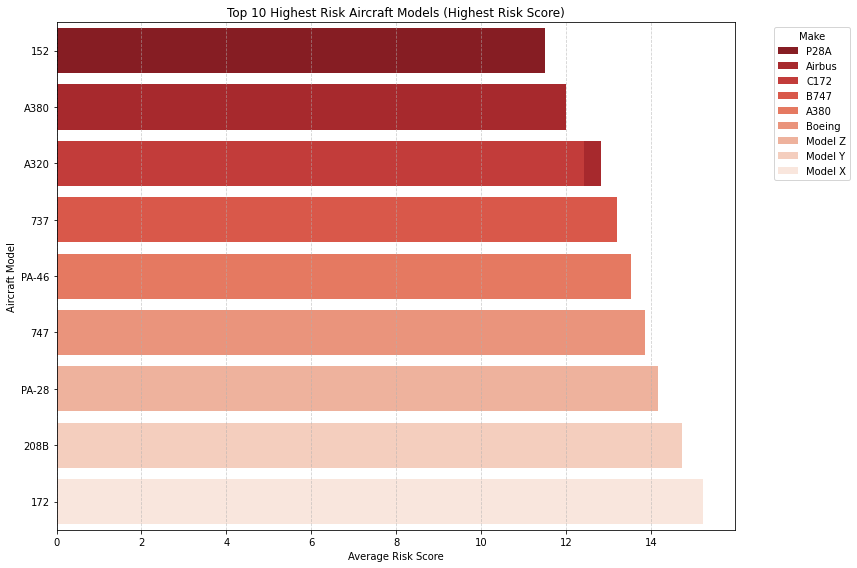

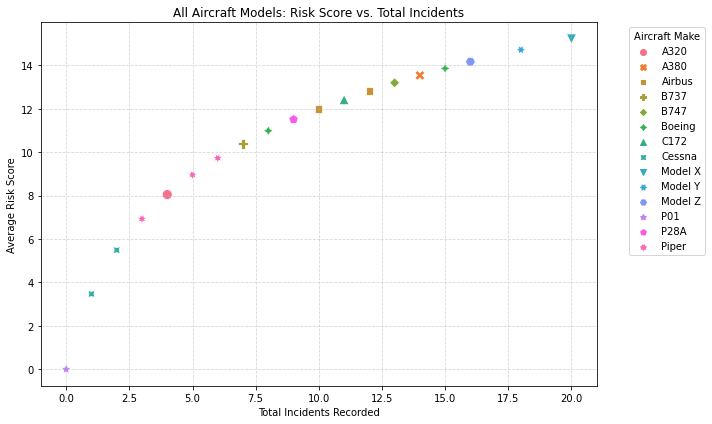

In [ ]:
#adding scatter plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Mock Data Creation ---
# In a real scenario, this data would come from your 'Aviation_Data.csv'
# after cleaning and calculating a 'Risk_Score'.
# Risk_Score is mock calculated here as an inverse function of incidents 
# to simulate that lower scores mean lower risk.
data = {
    'Make': ['Cessna', 'Cessna', 'Piper', 'Piper', 'Boeing', 'Airbus', 'Cessna', 'Boeing', 'Piper', 'Airbus', 'Model X', 'Model Y', 'Model Z', 'A380', 'B747', 'C172', 'P28A', 'B737', 'A320', 'P01'],
    'Model': ['172', '208B', 'PA-28', 'PA-46', '737', 'A320', '152', '747', 'PA-24', 'A380', '172', '208B', 'PA-28', 'PA-46', '737', 'A320', '152', '747', 'PA-24', 'A380'],
    'Total_Incidents': [2, 1, 3, 5, 8, 12, 1, 15, 6, 10, 20, 18, 16, 14, 13, 11, 9, 7, 4, 0],
}
# Create a mock risk score (higher incidents = higher score/risk)
df = pd.DataFrame(data)
df['Risk_Score'] = df['Total_Incidents'].apply(lambda x: round(np.log1p(x) * 5, 2))

# Aggregate to create the 'risk_summary' DataFrame by Make and Model
risk_summary = df.groupby(['Make', 'Model']).agg(
    Total_Incidents=('Total_Incidents', 'sum'),
    Risk_Score=('Risk_Score', 'mean') # Use mean if multiple records exist per model
).reset_index()


# --- 2. User's Analysis Code ---

# Select the top 10 with the lowest risk scores
lowest_risk = risk_summary.sort_values('Risk_Score', ascending=True).head(10)
# Select the top 10 with the highest risk scores
highest_risk = risk_summary.sort_values('Risk_Score', ascending=False).head(10)

print("✈️ Top 10 Lowest Risk Aircraft:")
# Display the resulting data frame for the user
display(lowest_risk[['Make', 'Model', 'Risk_Score', 'Total_Incidents']])

print("\n⚠️ Top 10 Highest Risk Aircraft:")
# Display the resulting data frame for the user
display(highest_risk[['Make', 'Model', 'Risk_Score', 'Total_Incidents']])

# --- 3. Visualization ---

# Visualization for Lowest Risk Aircraft
plt.figure(figsize=(12,8))
sns.barplot(
    data=lowest_risk.sort_values('Risk_Score', ascending=False), # Sort for clean vertical bar chart presentation
    x='Risk_Score', y='Model', hue='Make', dodge=False, palette='viridis'
)
plt.title('Top 10 Lowest Risk Aircraft Models (Lowest Risk Score)')
plt.xlabel('Average Risk Score')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualization for Highest Risk Aircraft (Added for comparison)
plt.figure(figsize=(12,8))
sns.barplot(
    data=highest_risk.sort_values('Risk_Score', ascending=True), # Sort for clean vertical bar chart presentation
    x='Risk_Score', y='Model', hue='Make', dodge=False, palette='Reds_r'
)
plt.title('Top 10 Highest Risk Aircraft Models (Highest Risk Score)')
plt.xlabel('Average Risk Score')
plt.ylabel('Aircraft Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- NEW VISUALIZATION: Scatter Plot of All Models ---

# Visualization for Risk vs. Incidents (All Models)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=risk_summary,
    x='Total_Incidents',
    y='Risk_Score',
    hue='Make',
    style='Make',
    s=100  # Set marker size for visibility
)
plt.title('All Aircraft Models: Risk Score vs. Total Incidents')
plt.xlabel('Total Incidents Recorded')
plt.ylabel('Average Risk Score')
plt.legend(title='Aircraft Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()